In [1]:
import os
import csv
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import bisect
from PIL import Image
import shutil
import random

num_classes = 2000

In [2]:
df = pd.read_csv('/home/kylecshan/data/train.csv')

In [3]:
df = df.sort_values('landmark_id')

In [4]:
#threshold = 100
counts = df.landmark_id.value_counts()
counts = pd.DataFrame(counts)

In [5]:
#threshold_cts = counts.loc[counts.landmark_id >= threshold, :]
#threshold_cts.columns = ['count']
#threshold_cts
threshold_cts = counts.iloc[:num_classes,:]
threshold_cts.columns = ['count']
threshold_cts.shape

(2000, 1)

In [6]:
def mkdir_if_not_exist(path):
    if not os.path.exists(path):
        os.mkdir(path)

In [ ]:
def copy_landmark(landmark, start, end, count, df):
    
    # Randomly shuffle indexes for imgs of this landmark
    np.random.seed(321)
    idx_shuffle = np.random.permutation(range(start, end))
    
    # Create folder
    train_dir = base_dir + 'train/' + str(landmark) + '/'
    val_dir = base_dir + 'val/' + str(landmark) + '/'
    index_dir = base_dir + 'index/' + str(landmark) + '/'
    for d in [train_dir, val_dir, index_dir]:
        mkdir_if_not_exist(d)
    
    num_to_copy = 24 + (count // 6) #examples_per_class 
    
    # Copy files over
    num_copied = 0;
    num_seen = 0;
    while num_copied < num_to_copy and num_seen < count:
        imgname = df.id.iloc[idx_shuffle[num_seen]]
        img_path = imgs_dir + imgname + '.jpg'
        try:
            im = Image.open(img_path)
            w,h = im.size
            if num_copied < 4:
                shutil.copy(img_path, val_dir)
            elif num_copied < 24:
                shutil.copy(img_path, val_dir)
            else:
                shutil.copy(img_path, index_dir)
            num_copied += 1
        except:
            pass # couldn't find image, oh well
        num_seen += 1
        
    print('landmark %d (%d / %d): copied %d out of %d total' % 
          (landmark, i, threshold_cts.size, num_copied, count))

In [ ]:
i = 0
base_dir = '/home/kylecshan/data/images224/train_ms2000_v5/'
imgs_dir = '/home/kylecshan/data/images224/all/'
trainvalindex = (0.7, 0.9) # boundary points

mkdir_if_not_exist(base_dir)
mkdir_if_not_exist(base_dir + 'train/')
mkdir_if_not_exist(base_dir + 'val/')
mkdir_if_not_exist(base_dir + 'index/')

for row in threshold_cts.itertuples():
    i += 1
    if i <= 0: # to resume from previous
        continue
    
    # Find indexes for this landmark
    landmark, count = row.Index, row.count
    start = df.landmark_id.searchsorted(landmark, side='left')
    end = df.landmark_id.searchsorted(landmark, side='right')
    
    # Randomly shuffle indexes for imgs of this landmark
    np.random.seed(321)
    idx_shuffle = np.random.permutation(range(start, end))
    
    # Create folder
    train_dir = base_dir + 'train/' + str(landmark) + '/'
    val_dir = base_dir + 'val/' + str(landmark) + '/'
    index_dir = base_dir + 'index/' + str(landmark) + '/'
    for d in [train_dir, val_dir, index_dir]:
        mkdir_if_not_exist(d)
    
    num_to_copy = count // 6 #examples_per_class 
    
    # Copy files over
    num_copied = 0;
    num_seen = 0;
    while num_copied < num_to_copy and num_seen < count:
        imgname = df.id.iloc[idx_shuffle[num_seen]]
        img_path = imgs_dir + imgname + '.jpg'
        try:
            im = Image.open(img_path)
            w,h = im.size
            if w >= 128 and h >= 128:
                if num_copied < num_to_copy * trainvaltest[0]:
                    shutil.copy(img_path, train_dir)
                elif num_copied < num_to_copy * trainvaltest[1]:
                    shutil.copy(img_path, val_dir)
                else:
                    shutil.copy(img_path, index_dir)
                num_copied += 1
        except:
            pass # couldn't find image, oh well
        num_seen += 1
        
    print('landmark %d (%d / %d): copied %d out of %d total' % 
          (landmark, i, threshold_cts.size, num_copied, count))
    #if i > 0:
    #    break

In [20]:
problems

[]

In [19]:
df[start:(start+10)]

,id,url,landmark_id
1318564,a11ad805fe8ecf26,https://upload.wikimedia.org/wikipedia/commons...,150660
512827,4be1dc2098cf4734,http://upload.wikimedia.org/wikipedia/commons/...,150660
1191516,36430f86e9c40413,https://upload.wikimedia.org/wikipedia/commons...,150660
1835355,1b9c2502a6b0ccdf,https://upload.wikimedia.org/wikipedia/commons...,150660
3740578,1724a121703e70c4,https://upload.wikimedia.org/wikipedia/commons...,150660
3923393,e50c1aaf93aa1628,https://upload.wikimedia.org/wikipedia/commons...,150660
2147877,0cf3759da1b55906,https://upload.wikimedia.org/wikipedia/commons...,150660
2643106,fe5d3e12ceae8b88,https://upload.wikimedia.org/wikipedia/commons...,150660
992258,dc264f5594d17143,https://upload.wikimedia.org/wikipedia/commons...,150660
1015205,27d960f7df3aa394,https://upload.wikimedia.org/wikipedia/commons...,150660


In [15]:
idx_shuffle

array([2827443, 2833920, 2829081, ..., 2829713, 2828004, 2830466])

Text(0.5, 1.0, 'Number of Examples per Class')

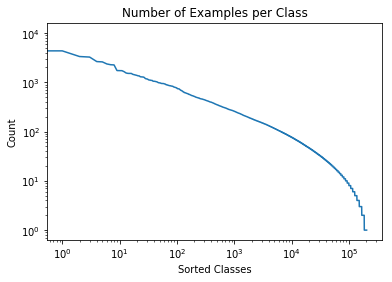

In [12]:
plt.plot(range(203094), counts)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Sorted Classes')
plt.ylabel('Count')
plt.title('Number of Examples per Class')

In [11]:
np.sum(counts.landmark_id < 10)

110354

In [13]:
len(counts)

203094